# Projeto 1 - José Antônio Bechara

### O ingresso na União Europeia contribuiu para a melhoria na qualidade de vida (IDH) e economia (PIB) dos países membros ? 


### Mecanismo:
<br>
https://europa.eu/european-union/about-eu/figures/economy_pt

#### De acordo com o próprio site da União Europeia, há uma enorme troca comercial entre seus países membros:

##### ("Mais de 64% das trocas comerciais dos países da UE realizam-se com outros países da UE. Embora a UE represente apenas 6,9% da população mundial, as suas trocas comerciais com o resto do mundo correspondem, aproximadamente, a 15,6% das exportações e importações mundiais.")
#### Isso mostra que países membros podem ter sua economia fortificada por meio das trocas comerciais entre  eles mesmos e assim se tornarem uma economia fortificada e independente do resto dos países que não fazem parte da UE. <br> Com a economia mais consolidada é possível observar melhorias na qualidade de vida deste grupo.

#### Vamos medir esses fatores por meio do PIB *per capita*, IDH e Importações (% do PIB), comparando os dados de antes com os dados após o ingresso na UE . Com a taxa de importações é possível ter um controle dos investimentos feitos aos países analisados e assim comparar com o PIB e o IDH para conseguir medir se houve ou não vantagem aos países se tornarem membros da União Europeia. 

### Países a serem analisados:

#### Cyprus
#### Czech Republic
#### Estonia
#### Hungary
#### Latvia
#### Lithuania
#### Malta
#### Poland
#### Slovakia
#### Slovenia

### Ano de ingresso: 2004

### Links dos dados:
https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS
<br>
https://hdr.undp.org/en
<br>
http://gapm.io/dgdppc

### Link para o GitHub:
https://github.com/JoseBechara/Projeto-1---2019.2.git

#### De acordo com o próprio site da União Europeia, há uma enorme troca comercial entre seus países membros:

##### ("Mais de 64% das trocas comerciais dos países da UE realizam-se com outros países da UE. Embora a UE represente apenas 6,9% da população mundial, as suas trocas comerciais com o resto do mundo correspondem, aproximadamente, a 15,6% das exportações e importações mundiais.")
#### Isso mostra que países membros podem ter sua economia fortificada por meio das trocas comerciais entre os eles mesmos e assim se tornarem uma economia fortificada e independente do resto dos países que não fazem parte da UE. <br> Com a economia mais consolidada é possível observar melhorias na qualidade de vida deste grupo.

#### Vamos medir esses fatores por meio do PIB per capita, IDH e Importações (% do PIB). Com a taxa de importações é possível ter um controle dos investimentos feitos aos países analisados e assim comparar com o PIB e o IDH para conseguir medir se houve ou não vantagem aos países se tornarem membros da União Europeia.

#### Usaremos também um grupo de controle, constituído pelos países pioneiros no bloco. Uma vez que eles possuem economias mais consolidadas nos possibilitando comparar os dados dos países analizados com os países do grupo de controle e assim observar se houve de fato melhorias nos nos países ingressados recentemente.

---

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Leitura dos arquivos em Excel
IDH = pd.read_excel('Indicator_HDI.xlsx')
PIB = pd.read_excel('GDPpercapita.xlsx')
Exports = pd.read_excel('Exports(percent_of_GDP).xlsx')

### Países membros da UE

In [3]:
UE = ["Austria", "Belgium", "Bulgaria", "Croatia", 
      "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
      "France", "Germany", "Greece", "Hungary", "Ireland",
      "Italy", "Latvia", "Lithuania", "Luxemburgo", "Malta",
      "Netherlands", "Poland", "Portugal", "Romania", "Slovak Republic",
      "Slovenia", "Spain", "Sweden", "United Kingdom"]

## IDH

In [4]:
IDH.head()

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
4,Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


## PIB

In [5]:
PIB.head()

,Income per person (fixed 2000 US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
4,Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


## Exportações (% do PIB) 

In [6]:
Exports.head()

,Exports of goods and services (% of GDP),1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4.453443,4.878051,9.171601,8.888893,11.258279,8.571429,6.772908,8.899677,10.094637,...,32.438501,42.295500,32.931170,30.550988,27.640178,22.926131,26.676120,22.860093,20.124519,18.106142
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.419307,20.619399,21.542118,22.273069,25.090526,28.777169,29.511318,28.411549,32.427471,33.800932
4,Algeria,46.244557,19.793872,24.684682,25.084059,22.603944,25.986197,23.434417,23.135635,23.788777,...,35.076150,38.266470,40.071885,47.646353,48.607848,46.609494,46.273658,29.289305,30.830405,NaN


### Escolhendo o ano:

In [7]:
IDH_ano = IDH.loc[:, ["HDI", 1980, 1990, 2000, 2005, 2006, 2007, 2008, 2009, 2011]]
PIB_ano = PIB.loc[:,["Income per person (fixed 2000 US$)", 1980, 1990, 2000, 2005, 2006, 2007, 2008, 2009, 2011]]
Exports_ano = Exports.loc[:, ["Exports of goods and services (% of GDP)", 1980, 1990, 2000, 2005, 2006, 2007, 2008, 2009, 2011]]

In [8]:
# IDH_ano.head()

In [9]:
# PIB_ano.head()

In [10]:
# Exports_ano.head()

### Mudando o índice: 

In [11]:
IDH_idx = IDH_ano.set_index('HDI')
# IDH_idx.head()

In [12]:
PIB_idx = PIB_ano.set_index('Income per person (fixed 2000 US$)')
# PIB_idx.head()

In [13]:
Exports_idx = Exports_ano.set_index('Exports of goods and services (% of GDP)')
# Exports_idx.head()

### Adicionando coluna da UE

In [14]:
# i = 0
# for e in PIB_idx.index:
#     if e not in IDH_idx.index:
#         i+=1
#         print(e)
# print(i, "países diferentes!!")
        
# ### Os DataFrames possuem número diferente de países !!!

In [15]:
# i = 0
# for e in PIB_idx.index:
#     if e not in Exports_idx.index:
#         i+=1
#         print(e)
# print(i, "países diferentes!!")
        
# ### Os DataFrames possuem número diferente de países !!!

In [16]:
# Para o PIB:
Uniao_Europeia_PIB = []
for e in PIB_idx.index: 
    if e in UE: 
        Uniao_Europeia_PIB.append(True)
    else: 
        Uniao_Europeia_PIB.append(False)
        
# Para o IDH:
Uniao_Europeia_IDH = []
for e in IDH_idx.index: 
    if e in UE: 
        Uniao_Europeia_IDH.append(True)
    else: 
        Uniao_Europeia_IDH.append(False)
               
# Para o IDH:
Uniao_Europeia_Exports = []
for e in Exports_idx.index: 
    if e in UE: 
        Uniao_Europeia_Exports.append(True)
    else: 
        Uniao_Europeia_Exports.append(False)        

In [17]:
PIB_idx["União Europeia"] = Uniao_Europeia_PIB
# PIB_idx.head()

In [18]:
IDH_idx["União Europeia"] = Uniao_Europeia_IDH
# IDH_idx.head()

In [19]:
Exports_idx["União Europeia"] = Uniao_Europeia_Exports
# Exports_idx.head()

### Filtrando os países: 

In [20]:
IDH_country = IDH_idx.loc[["Cyprus","Czech Republic","Estonia","Hungary","Latvia","Lithuania","Malta","Poland","Slovak Republic",
                           "Slovenia"],:]
# IDH_country

In [21]:
PIB_country = PIB_idx.loc[["Cyprus","Czech Republic","Estonia","Hungary","Latvia","Lithuania","Malta",
                           "Poland","Slovak Republic","Slovenia"],:]
# PIB_country

In [22]:
Exports_country = Exports_idx.loc[["Cyprus","Czech Republic","Estonia","Hungary","Latvia","Lithuania","Malta",
                                   "Poland","Slovak Republic","Slovenia"],:]
# Exports_country

### Criando um grupo de controle:

In [23]:
IDH_controle = IDH_idx.loc[["France", "Germany", "United Kingdom", "Italy"],:]
# IDH_controle

In [24]:
PIB_controle = PIB_idx.loc[["France", "Germany", "United Kingdom", "Italy"],:]
# PIB_controle

In [25]:
Exports_controle = Exports_idx.loc[["France", "Germany", "United Kingdom", "Italy"],:]
# Exports_controle

### Juntando os DataFrames:

In [26]:
Analise = IDH_country.join(PIB_country, how='inner', lsuffix='_IDH', rsuffix='_PIB')
Analise = Analise.join(Exports_country, how="left", lsuffix =" ", rsuffix='_Exports')
# Analise.head()

In [27]:
def reta(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

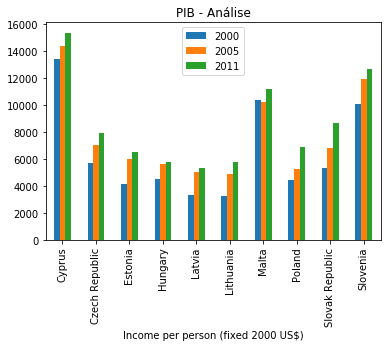

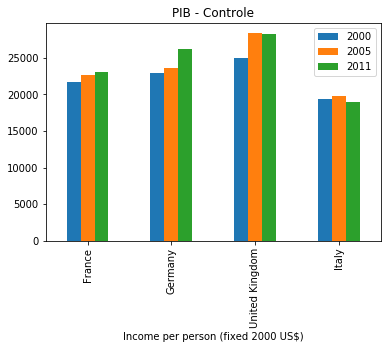

In [36]:
PIB_country.loc[:,[2000, 2005, 2011]].plot.bar(title = "PIB - Análise");
PIB_controle.loc[:,[2000, 2005, 2011]].plot.bar(title = "PIB - Controle");


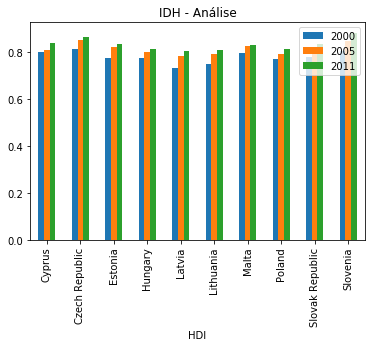

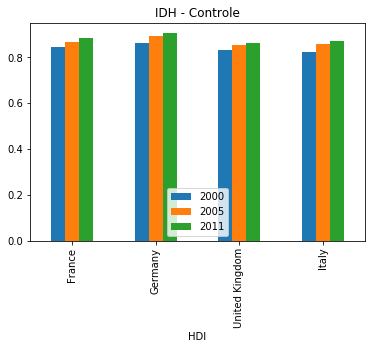

In [37]:
IDH_country.loc[:,[2000, 2005, 2011]].plot.bar(title = "IDH - Análise");
IDH_controle.loc[:,[2000, 2005, 2011]].plot.bar(title = "IDH - Controle");

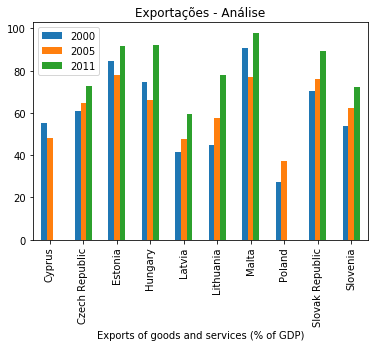

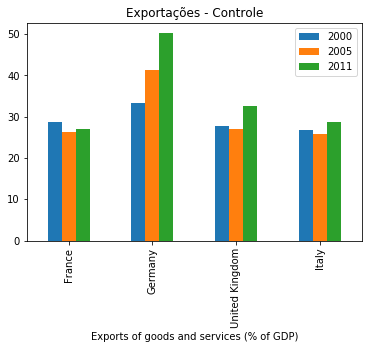

In [38]:
Exports_country.loc[:,[2000, 2005, 2011]].plot.bar(title = "Exportações - Análise");
Exports_controle.loc[:,[2000, 2005, 2011]].plot.bar(title = "Exportações - Controle");

** Nos gráficos de barras acima foram analisados a evolução temporal do IDH, PIB per capita e Exportação no grupo de controle e análise. Pode-se observar uma melhora significativa em todas as variáveis, destaque para o IDH que deu um "salto" entre os anos de 2000 e 2005 (sendo que o ano de ingresso na UE foi 2004).  **

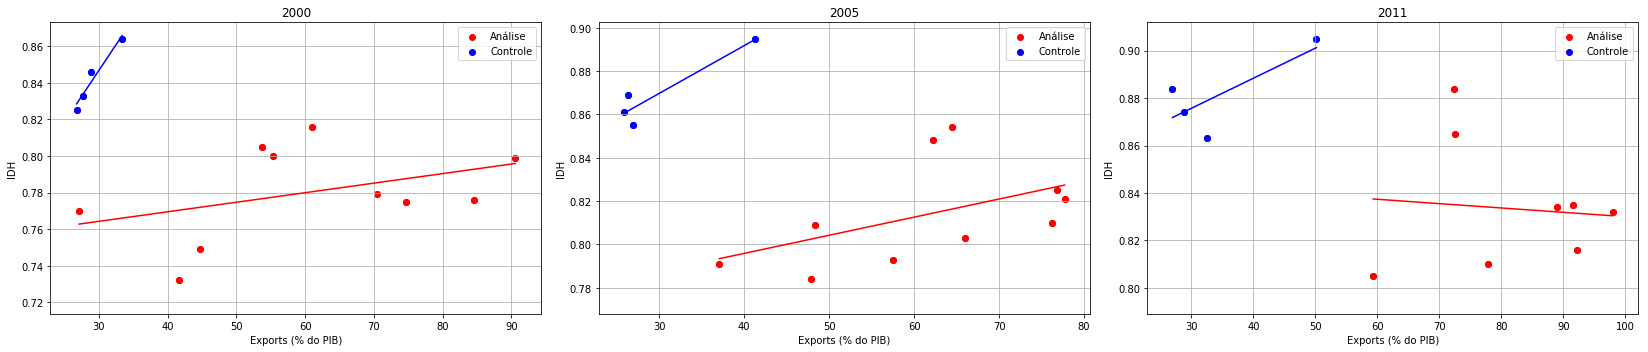

In [31]:
fig = plt.figure(figsize=(23,5))


plt.subplot(1,3,1)
plt.scatter(Exports_country.loc[:,2000], IDH_country.loc[:,2000], label = ("Análise"), c = "r")
plt.scatter(Exports_controle.loc[:,2000], IDH_controle.loc[:,2000], label = ("Controle"), c = "b")
plt.legend()
reta(Exports_country.loc[:,2000], IDH_country.loc[:,2000], "r")
reta(Exports_controle.loc[:,2000], IDH_controle.loc[:,2000], "b")
plt.title("2000")
plt.xlabel("Exports (% do PIB)")
plt.ylabel("IDH")
plt.grid(True)

plt.subplot(1,3,2)
plt.scatter(Exports_country.loc[:,2005], IDH_country.loc[:,2005], label = ("Análise"), c = "r")
plt.scatter(Exports_controle.loc[:,2005], IDH_controle.loc[:,2005], label = ("Controle"), c = "b")
plt.legend()
reta(Exports_country.loc[:,2005], IDH_country.loc[:,2005], "r")
reta(Exports_controle.loc[:,2005], IDH_controle.loc[:,2005], "b")
plt.title("2005")
plt.xlabel("Exports (% do PIB)")
plt.ylabel("IDH")
plt.grid(True)

plt.subplot(1,3,3)
plt.scatter(Exports_country.loc[:,2011], IDH_country.loc[:,2011], label = ("Análise"), c = "r")
plt.scatter(Exports_controle.loc[:,2011], IDH_controle.loc[:,2011], label = ("Controle"), c = "b")
plt.legend()
reta(Exports_country.loc[:,2011], IDH_country.loc[:,2011], "r")
reta(Exports_controle.loc[:,2011], IDH_controle.loc[:,2011], "b")
plt.title("2011")
plt.xlabel("Exports (% do PIB)")
plt.ylabel("IDH")
plt.grid(True)

plt.show()

** Nos gráficos de dispersão acima foram analisados o IDH pela taxa de Exportações. Pode-se observar uma evolução em ambos, vale observar que o grupo de controle (constituído pela França, Alemanha, Reino Unido e Italia) tem a sua reta de tendência "puxada para cima" devido ao alto IDH da alemanha, visto que a taxa de exportação do grupo de análise tenha praticamente dobrado em média. **

In [49]:
print("2000: ", "Média de IDH - Análise: ",round(IDH_country.loc[:,2000].mean(),3), "            |","Média de IDH - Controle:",round(IDH_controle.loc[:,2000].mean(),3))
print("      ", "Média do PIB - Análise: ",round(PIB_country.loc[:,2000].mean(), 3), "         |","Média do PIB - Controle:", round(PIB_controle.loc[:,2000].mean(), 3))
print("      ", "Média de Exportações - Análise: ",round(Exports_country.loc[:,2000].mean(), 3),"%", "|","Média de Exportações - Controle:", round(Exports_controle.loc[:,2000].mean(), 3))
print("")
print("2005: ", "Média de IDH - Análise: ",round(IDH_country.loc[:,2005].mean(),3), "           |","Média de IDH - Controle:",round(IDH_controle.loc[:,2005].mean(),3))
print("      ", "Média do PIB - Análise: ",round(PIB_country.loc[:,2005].mean(), 3), "        |","Média do PIB - Controle:", round(PIB_controle.loc[:,2005].mean(), 3))
print("      ", "Média de Exportações - Análise: ",round(Exports_country.loc[:,2005].mean(), 3),"%", "|","Média de Exportações - Controle:", round(Exports_controle.loc[:,2005].mean(), 3))
print("")
print("2011: ", "Média de IDH - Análise: ",round(IDH_country.loc[:,2011].mean(),3), "           |","Média de IDH - Controle:",round(IDH_controle.loc[:,2011].mean(),3))
print("      ", "Média do PIB - Análise: ",round(PIB_country.loc[:,2011].mean(), 3), "        |","Média do PIB - Controle:", round(PIB_controle.loc[:,2011].mean(), 3))
print("      ", "Média de Exportações - Análise: ",round(Exports_country.loc[:,2011].mean(), 3),"%", "|","Média de Exportações - Controle:", round(Exports_controle.loc[:,2011].mean(), 3))



2000:  Média de IDH - Análise:  0.78             | Média de IDH - Controle: 0.842
       Média do PIB - Análise:  6460.83          | Média do PIB - Controle: 22291.649
       Média de Exportações - Análise:  60.371 % | Média de Exportações - Controle: 29.17

2005:  Média de IDH - Análise:  0.814            | Média de IDH - Controle: 0.87
       Média do PIB - Análise:  7712.084         | Média do PIB - Controle: 23608.654
       Média de Exportações - Análise:  61.413 % | Média de Exportações - Controle: 30.128

2011:  Média de IDH - Análise:  0.833            | Média de IDH - Controle: 0.882
       Média do PIB - Análise:  8615.097         | Média do PIB - Controle: 24108.263
       Média de Exportações - Análise:  81.594 % | Média de Exportações - Controle: 34.616


** Nessa tabela é bem notável o aumento do IDH médio no grupo de análise entre os anos de 2000 e 2005, se aproximando do grupo de controle em 2011. Vale notar que a taxa de exportação média do grupo de controle é menor do que a taxa do grupo de análise, embora o PIB do grupo de controle aida seja muito mais alto.  **

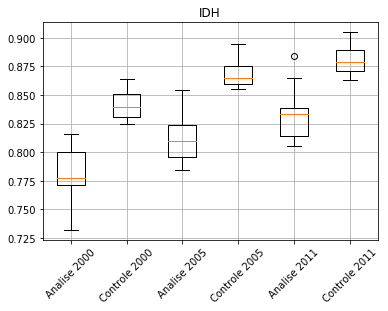

In [33]:
labels = ['Analise 2000', "Controle 2000", 'Analise 2005', "Controle 2005", 'Analise 2011', "Controle 2011"]

data = [IDH_country[2000], IDH_controle[2000], IDH_country[2005],IDH_controle[2005], IDH_country[2011],IDH_controle[2011]]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(labels, rotation=45, fontsize=10)
plt.title("IDH")
plt.grid(True)

plt.show()

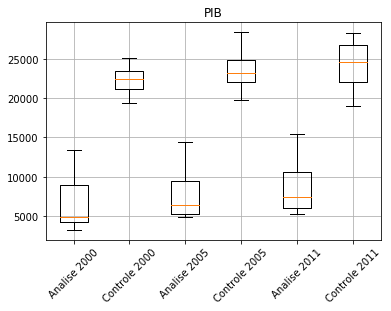

In [34]:
labels = ['Analise 2000', "Controle 2000", 'Analise 2005', "Controle 2005", 'Analise 2011', "Controle 2011"]

data = [PIB_country[2000], PIB_controle[2000], PIB_country[2005],PIB_controle[2005], PIB_country[2011],PIB_controle[2011]]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(labels, rotation=45, fontsize=10)
plt.title("PIB")
plt.grid(True)

plt.show()